In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [3]:
transform=transforms.Compose([
    transforms.ToTensor(),## 0->255 to 0->1
    transforms.Normalize((0.5),(0.5))##using normalize 0->1 to -1 to +1 when data is 0 centered nn will learn better mean,std as arguements normalized pixel=pixel-mean/std
])

train_dataset=datasets.MNIST(
    root="data",
    train=True,
    transform=transform,
    download=True
)

test_dataset=datasets.MNIST(
    root="data",
    train=False,
    transform=transform,
    download=True
)

In [4]:
len(train_dataset)

60000

In [5]:
len(test_dataset)

10000

In [6]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=True)

In [7]:
data_iter=iter(train_loader)
images,labels=next(data_iter)

In [8]:
images.shape

torch.Size([64, 1, 28, 28])

In [21]:
labels.shape

torch.Size([64])

In [26]:
labels.size()

torch.Size([16])

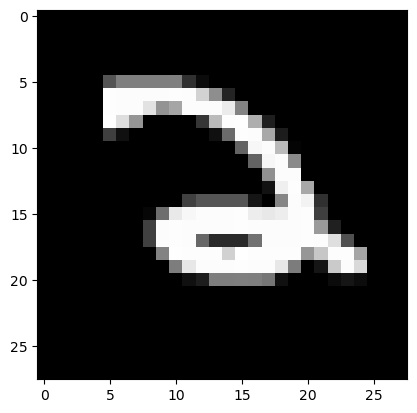

In [9]:
plt.imshow(images[0].squeeze(),cmap="gray")

In [10]:
labels[0]

tensor(2)

In [11]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),##28*28 into array of 784 pixels
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        return self.network(x)

In [ ]:
model=DigitsClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)##like gd only but its optimized
criterion=nn.CrossEntropyLoss()##multi class classification criterion is a function


In [ ]:
epochs=5

for epoch in range(epochs):
    running_loss=0.0
    for images,labels in train_loader:
        #1.Forward pass
        outputs=model(images)##outputs is like 
        loss=criterion(outputs,labels)

        running_loss+=loss.item()

        #2.Backward pass
        optimizer.zero_grad()##making previous gradients 0 
        loss.backward()

        #3.weight update
        optimizer.step() #w_old=w_new-learning_rate*gradient

    print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader)}") 
        


Epoch 1 loss: 0.39347178722495463
Epoch 2 loss: 0.184409593390837
Epoch 3 loss: 0.13247496748406654
Epoch 4 loss: 0.10829104978873182
Epoch 5 loss: 0.09484550174174787


In [ ]:
# ##Yes, exactly! 👍

# For outputs in the context of your for images, labels in train_loader: loop, it is a 2D PyTorch tensor. Each row of this 2D tensor is a 1D array (or vector) of size 10, representing the model's predicted logits for one image in the batch.

# So, if your batch_size is 64, the outputs tensor will have a shape of [64, 10].

# The first dimension (64) corresponds to the number of images in the current batch.

# The second dimension (10) corresponds to the 10 output logits (unnormalized scores) for each of the 10 possible classes (digits 0-9).

### Model Evaluation

In [ ]:
model.eval()

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        print(outputs)
        break


tensor([[ 1.2775e+01, -5.7256e+00, -2.8206e-01, -7.0219e+00, -6.0243e+00,
         -5.8277e+00,  2.4789e+00, -7.2803e+00, -5.1882e+00, -2.5150e+00],
        [-1.4346e+00,  9.6965e+00, -3.6848e+00, -3.9955e+00, -1.4957e+00,
         -7.1997e+00, -4.3065e+00, -3.4331e+00,  5.8829e-01, -8.1213e+00],
        [-2.3652e+00, -3.1458e+00, -1.4958e+00,  7.1528e+00, -7.5926e+00,
          1.7474e+00, -1.1907e+01, -6.7203e-01, -3.6750e-01,  2.9547e+00],
        [-3.0401e+00, -9.5181e-01, -5.8707e-01, -1.2124e+00, -8.3529e+00,
          1.7998e+00, -1.2072e+01,  8.4686e+00, -2.8273e+00, -3.6946e+00],
        [-5.0683e+00,  1.7557e+00, -5.4911e+00, -5.2017e+00,  1.3459e+01,
         -6.7945e+00, -3.1089e+00,  1.2889e+00, -3.2040e+00,  3.0224e+00],
        [-8.3285e+00, -5.8989e+00,  9.0695e+00, -5.5531e-02, -5.4915e+00,
         -3.1209e+00, -9.0694e+00, -1.5647e+00, -1.6563e-01, -7.8836e+00],
        [-4.0753e+00,  1.8188e+00,  4.5745e-01, -4.2410e-01, -5.5717e+00,
         -5.0990e+00, -1.5184e+0

In [15]:
with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        print(outputs.shape)
        break

torch.Size([64, 10])


In [ ]:
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        print(outputs[0])
        print(labels[0])
        break

tensor([-3.4055, -5.7618, -5.1618, -0.5579,  5.3081, -3.2464, -9.2675,  0.8436,
        -1.3821, 11.3503])
tensor(9)


In [19]:
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        print(torch.max(outputs,1))
        break

torch.return_types.max(
values=tensor([ 9.0431, 13.4497, 11.7283, 12.3255, 10.6073, 11.0604, 10.3523, 12.4147,
        10.5663, 14.7578, 12.2794,  7.4911, 11.2760, 11.8042,  8.2640, 15.6971,
         6.9858,  3.3383,  6.2242,  9.2844,  7.5165, 10.0128,  9.6906,  8.0106,
         8.1714, 14.0463,  7.8441,  8.3875,  8.7397,  8.1071,  9.5964, 13.2199,
        12.0412,  8.6424,  7.3055,  8.4777,  9.1414, 12.9653, 10.1586,  8.2396,
         6.9650,  8.8410, 13.6956,  7.5089, 12.2060,  5.7532, 12.5767,  6.5501,
         6.4112, 11.7999,  4.3599,  6.5903,  8.7955,  4.2298, 10.5608,  9.5085,
         8.8209,  7.3833,  9.0771,  5.8993, 10.1134, 11.9825,  7.3348, 11.3323]),
indices=tensor([2, 8, 2, 7, 2, 4, 1, 5, 9, 8, 2, 4, 9, 4, 7, 2, 9, 0, 2, 7, 1, 1, 9, 7,
        1, 3, 9, 9, 1, 6, 2, 6, 5, 1, 7, 2, 5, 7, 3, 2, 1, 2, 0, 1, 5, 2, 0, 9,
        5, 7, 4, 4, 6, 6, 3, 7, 6, 9, 3, 7, 3, 0, 3, 3]))


<!-- ##torch.max(outputs, 1) returns a tuple where the first tensor contains the maximum value of each row in outputs, and the second tensor contains the index of that maximum value for each row.

First tensor (values): This will have a shape of [batch_size, 1]. For each image in the batch, it gives you the highest predicted logit.

Second tensor (indices): This will also have a shape of [batch_size, 1] (or sometimes just [batch_size]). For each image, it gives you the index (0-9 for MNIST) where the maximum logit was found, which is the model's predicted class. -->

In [20]:
##it gave the values and the index we are interested in is index 1 as it is the predicted digit
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs,1)
        print(predicted)
        break

tensor([4, 8, 9, 9, 6, 6, 0, 6, 4, 9, 5, 6, 4, 6, 3, 4, 6, 2, 2, 2, 8, 5, 6, 8,
        4, 5, 9, 0, 2, 9, 4, 8, 2, 8, 3, 8, 8, 8, 2, 1, 0, 1, 2, 9, 4, 8, 6, 9,
        7, 8, 6, 5, 8, 0, 7, 3, 9, 1, 9, 5, 7, 1, 9, 8])


In [22]:
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs,1)
        print(predicted)
        print(labels)
        break

tensor([6, 5, 8, 6, 6, 1, 2, 2, 8, 0, 1, 9, 4, 5, 0, 7, 9, 2, 9, 1, 4, 9, 2, 1,
        2, 3, 2, 5, 5, 0, 9, 9, 3, 2, 5, 7, 3, 2, 1, 1, 9, 8, 7, 5, 2, 2, 5, 3,
        1, 7, 2, 6, 7, 0, 8, 3, 1, 0, 7, 1, 1, 9, 2, 9])
tensor([6, 9, 8, 6, 6, 1, 2, 2, 8, 2, 1, 9, 4, 5, 0, 7, 9, 2, 9, 1, 4, 9, 2, 1,
        2, 3, 2, 5, 5, 0, 9, 9, 3, 3, 5, 7, 3, 2, 1, 1, 9, 8, 7, 5, 2, 2, 5, 3,
        1, 7, 2, 6, 7, 0, 8, 3, 1, 9, 7, 1, 1, 9, 7, 9])


In [23]:
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs,1)
        print(predicted)
        print(labels)
        print(predicted==labels)
        break

tensor([2, 3, 8, 2, 4, 7, 8, 9, 8, 5, 1, 8, 8, 3, 6, 8, 7, 2, 0, 2, 5, 1, 4, 3,
        3, 6, 5, 5, 8, 3, 3, 6, 6, 4, 8, 7, 0, 8, 9, 4, 4, 5, 0, 8, 4, 6, 4, 0,
        3, 4, 9, 9, 7, 6, 1, 2, 4, 0, 2, 7, 3, 0, 3, 5])
tensor([2, 3, 8, 2, 4, 7, 8, 9, 8, 5, 1, 8, 8, 5, 6, 8, 7, 2, 0, 2, 5, 1, 6, 3,
        3, 6, 5, 5, 8, 3, 3, 6, 6, 4, 8, 7, 0, 8, 9, 4, 4, 5, 0, 8, 4, 6, 4, 0,
        3, 2, 9, 9, 7, 6, 1, 2, 4, 0, 2, 7, 3, 0, 3, 5])
tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True])


In [24]:
with torch.no_grad():##index 9 is the predicted digit
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs,1)
        print(predicted)
        print(labels)
        print((predicted==labels).sum())
        break

tensor([3, 9, 5, 9, 0, 8, 0, 2, 6, 9, 1, 4, 7, 0, 4, 7, 9, 9, 1, 9, 9, 3, 4, 7,
        4, 7, 2, 1, 2, 4, 2, 1, 4, 8, 6, 7, 6, 2, 1, 7, 6, 9, 4, 0, 7, 3, 0, 3,
        0, 3, 3, 1, 7, 0, 1, 4, 1, 9, 3, 1, 6, 1, 6, 2])
tensor([3, 9, 5, 9, 0, 8, 0, 2, 6, 9, 1, 4, 7, 0, 4, 7, 9, 9, 1, 9, 9, 3, 4, 7,
        4, 7, 2, 1, 2, 4, 2, 1, 4, 8, 6, 7, 5, 2, 1, 7, 6, 9, 4, 0, 7, 3, 0, 3,
        0, 3, 3, 1, 7, 0, 1, 4, 1, 9, 3, 1, 6, 7, 6, 2])
tensor(62)


In [25]:
total=0
correct=0

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item() ##to convert 1d tensor to scalar

print(f"Accuracy: {correct/total}")

Accuracy: 0.9641


In [27]:
total,correct

(10000, 9641)